# 1. Introdução

## 1.1 Objetivo do Notebook

Este notebook tem como objetivo realizar uma análise exploratória completa do dataset *Gait in Parkinson’s Disease*, investigando detalhadamente as suas características demográficas, clínicas e biomecânicas. Essa análise inclui o estudo dos artigos originais de coleta de dados, estrutura das variáveis brutas, padrões de marcha, além da geração de visualizações dos dados.

Os dados de marcha utilizados para classificação da Doença de Parkinson foram coletados por meio de sensores de força acoplados a calçados instrumentados, durante caminhadas realizadas em diferentes cenários. Esses atributos vão ser processados e utilizados posteriormente para treinar e avaliar modelos de machine learning capazes de identificar padrões de marcha associado a doença.

## 1.2 Sobre o Dataset GaitPDB

O banco de dados *Gait in Parkinson's Disease*, é composto de por 4 publicações consideradas relevantes e que estabelecem a base para o entendimento da marcha na Doença de Parkinson. Essas 4 publicações base são:

1.   Frenkel-Toledo S, Giladi N, Peretz C, Herman T, Gruendlinger L, Hausdorff JM. *Effect of gait speed on gait rhythmicity in Parkinson's disease: variability of stride time and swing time respond differently.* Journal of NeuroEngineering and Rehabilitation 2005: 2:23.
2.   Frenkel-Toledo, S, Giladi N, Peretz C, Herman T, Gruendlinger L, Hausdorff JM. *Treadmill walking as a pacemaker to improve gait rhythm and stability in Parkinson's disease.* Movement Disorders 2005; 20(9):1109-1114.
3.   Hausdorff JM, Lowenthal J, Herman T, Gruendlinger L, Peretz C, Giladi N. *Rhythmic auditory stimulation modulates gait variability in Parkinson's disease*  Eur J Neuroscience 2007; 26: 2369-2375.
4.   Yogev G, Giladi N, Peretz C, Springer S, Simon ES, Hausdorff JM. *Dual tasking, gait rhythmicity, and Parkinson's disease: Which aspects of gait are attention demanding?*  Eur J Neuroscience 2005; 22:1248-1256.


O dataset é um conjunto rico de registros de marcha obtidos por meio de sapatos instrumentados com sensores de força em N (8 sensores por pé). Ele reúne dados de 166 indivíduos, dos quais:

*   93 são pacientes com Doença de Parkinson (DP) - 58 homens e 35 mulheres
*   73 são controles saudáveis (CO) -  40 homens e 33 mulheres

## 1.3 Referências Originais

A composição do dataset se dá por amostras resultantes de 3 experimentos das 4 publicações aprensentadas. Sendo eles:

*   Ga [Yogev et al. 2005] - Influência cognitiva
*   Ju [Hausdorff et al. 2007] - Estímulo auditivo rítmico
*   Si [Frenkel-Toledo et al. 2005b] - Caminhada na esteira



# 2. Preparação do Ambiente

## 2.1 Importando os arquivos no Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.2 Listagem dos Arquivos

In [ ]:
from pathlib import Path

root = Path('/content/drive/MyDrive')
matches = list(root.rglob('*gait-in-parkinsons-disease-1.0.0*'))[:10]
for m in matches[:20]:
    print(m)

/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0


In [ ]:
from pathlib import Path

pasta = matches[0]
arquivos = list(pasta.rglob('*'))

for a in arquivos:
    print(a)

/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuCo06_01.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuPt28_04.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuPt28_05.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/GaPt24_10.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/SiPt14_01.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/SiPt29_01.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/GaCo09_02.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuCo19_01.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuPt03_05.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/GaPt14_10.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/GaPt08_02.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/GaPt28_10.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/SiCo22_01.txt
/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0/JuPt24_01.txt
/content/drive/MyDri

## 2.3 Organização inicial dos arquivos

Aqui, vamos separar por estudo cada uma das condições de testes do qual os pacientes foram submetidos.

In [ ]:
import pandas as pd

tabela = pd.DataFrame([
    ["Ga", "01", "Marcha usual (Baseline)", "Caminhada em ritmo confortável sem tarefa secundária."],
    ["Ga", "02", "Tarefa simples", "Caminhada enquanto ouve um texto (baixa carga cognitiva)."],
    ["Ga", "10", "Tarefa aritmética", "Caminhada enquanto realiza subtrações seriais de 7 (alta carga cognitiva)."],

    ["Ju", "01", "Marcha usual (Baseline)", "Caminhada em ritmo confortável sem estímulo sonoro."],
    ["Ju", "02", "RAS 100%", "Caminhada com Estímulo Auditivo Rítmico (RAS) na cadência usual."],
    ["Ju", "03", "Carryover 1", "Marcha sem RAS imediatamente após J2 (efeito de transferência imediata)."],
    ["Ju", "04", "RAS 110%", "Caminhada com RAS 10% mais rápido que a cadência usual."],
    ["Ju", "05", "Carryover 2", "Marcha sem RAS imediatamente após J4 (efeito de transferência imediata)."],
    ["Ju", "06", "Carryover 3", "Marcha sem RAS após 15 minutos de descanso (efeito de transferência tardia)."],

    ["Si", "03", "Marcha em esteira", "Caminhada em esteira elétrica (estímulo mecânico rítmico)."],
],
columns=["Estudo", "Código", "Condição de Teste", "Descrição Detalhada"])

display(tabela)

,Estudo,Código,Condição de Teste,Descrição Detalhada
0,Ga,01,Marcha usual (Baseline),Caminhada em ritmo confortável sem tarefa secu...
1,Ga,02,Tarefa simples,Caminhada enquanto ouve um texto (baixa carga ...
2,Ga,10,Tarefa aritmética,Caminhada enquanto realiza subtrações seriais ...
3,Ju,01,Marcha usual (Baseline),Caminhada em ritmo confortável sem estímulo so...
4,Ju,02,RAS 100%,Caminhada com Estímulo Auditivo Rítmico (RAS) ...
5,Ju,03,Carryover 1,Marcha sem RAS imediatamente após J2 (efeito d...
6,Ju,04,RAS 110%,Caminhada com RAS 10% mais rápido que a cadênc...
7,Ju,05,Carryover 2,Marcha sem RAS imediatamente após J4 (efeito d...
8,Ju,06,Carryover 3,Marcha sem RAS após 15 minutos de descanso (ef...
9,Si,03,Marcha em esteira,Caminhada em esteira elétrica (estímulo mecâni...


Abaixo, vamos pegar um exemplo como forma de visualizar e explicar o restante da nossa base.

In [ ]:
import pandas as pd
import numpy as np

# Pegando o JuPt01_01 como exemplo
p = Path(matches[0]) / 'GaCo01_01.txt'

colunas_normalizadas = [
    'Tempo',
    'LVGRF1', 'LVGRF2', 'LVGRF3', 'LVGRF4', 'LVGRF5', 'LVGRF6',
    'LVGRF7', 'LVGRF8',
    'RVGRF1', 'RVGRF2', 'RVGRF3', 'RVGRF4', 'RVGRF5', 'RVGRF6',
    'R_VGRF7', 'RVGRF8',
    'Total_L',
    'Total_R'
]

df = pd.read_csv(p, sep='\s+', header=None, names=colunas_normalizadas)

print("\nHead\n")
print(df.head())

print("\nShape\n")
print(df.shape)

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4262265296.py:17: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(p, sep='\s+', header=None, names=colunas_normalizadas)



Head

   Tempo  LVGRF1  LVGRF2  LVGRF3  LVGRF4  LVGRF5  LVGRF6  LVGRF7  LVGRF8  \
0   0.00   199.1   87.34   91.08   24.09   21.12   87.67   87.23   64.57   
1   0.01   199.1   87.34   91.08   24.09   21.12   87.67   87.23   64.57   
2   0.02   199.1   87.34   91.08   24.09   21.12   87.67   87.23   62.59   
3   0.03   199.1   87.34   91.08   24.09   21.12   87.67   89.10   64.57   
4   0.04   199.1   87.34   91.08   24.09   21.12   87.67   87.23   62.59   

   RVGRF1  RVGRF2  RVGRF3  RVGRF4  RVGRF5  RVGRF6  R_VGRF7  RVGRF8  Total_L  \
0   163.9   79.86  112.42   50.82   13.75  102.74   144.98   79.53   662.20   
1   163.9   79.86  112.42   50.82   13.75  102.74   144.98   79.53   662.20   
2   163.9   79.86  112.42   50.82   13.75  102.74   144.98   79.53   660.22   
3   163.9   77.55  112.42   48.07   13.75  105.49   144.98   79.53   664.07   
4   163.9   77.55  112.42   50.82   13.75  105.49   144.98   79.53   660.22   

   Total_R  
0   748.00  
1   748.00  
2   748.00  
3   745.6

Dados de Força de Reação ao Vertical do Solo (VGRF) coletados em Newtons (N).

# 3. Dados Demográficos

## 3.1 Leitura do "Demographics"

Nesta etapa, vamos fazer uma análise profunda dos dados demográficos da nossa base, que está disponibilizada como um arquivo único como "demographics.txt"

In [ ]:
import pandas as pd
from pathlib import Path

p = Path(matches[0]) / "demographics.xls"

df = pd.read_excel(p)

print("\nHead\n")
print(df.head())

print("\nShape\n")
print(df.shape)


Head

       ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0  GaPt03    Ga    PD        3  female   82             1.45         50.0   
1  GaPt04    Ga    PD        4    male   68             1.71          NaN   
2  GaPt05    Ga    PD        5  female   82             1.53         51.0   
3  GaPt06    Ga    PD        6    male   72             1.70         82.0   
4  GaPt07    Ga    PD        7  female   53             1.67         54.0   

   HoehnYahr  UPDRS  UPDRSM   TUAG  Speed_01 (m/sec)  Speed_10  
0        3.0   20.0    10.0  36.34               NaN     0.778  
1        2.5   25.0     8.0  11.00             0.642     0.818  
2        2.5   24.0     5.0  14.50             0.908     0.614  
3        2.0   16.0    13.0  10.47             0.848     0.937  
4        3.0   44.0    22.0  18.34             0.677     0.579  

Shape

(166, 14)


Algumas estatísticas relavantes sobre os dados, que nos mostram informações relevantes sobre a base de dados, como a predominânica do sexo masculino, a média de idade

In [ ]:
import pandas as pd
from pathlib import Path

p = Path(matches[0]) / "demographics.xls"

df = pd.read_excel(p)

print("Estatísticas")
desc = df.describe(include='all').T
display(desc.iloc[:14])

Estatísticas


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,166,166,GaPt03,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Study,166,3,Si,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,166,2,PD,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subjnum,166.0,NaN,NaN,NaN,16.46988,9.549663,1.0,8.25,16.0,23.75,40.0
Gender,166,2,male,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,166.0,NaN,NaN,NaN,65.138554,9.20007,36.0,59.0,65.0,71.0,86.0
Height (meters),163.0,NaN,NaN,NaN,57.634233,78.790179,1.45,1.655,1.74,160.0,185.0
Weight (kg),163.0,NaN,NaN,NaN,72.558282,12.095861,47.0,64.0,72.0,80.0,105.0
HoehnYahr,111.0,NaN,NaN,NaN,1.891892,0.892915,0.0,2.0,2.0,2.5,3.0
UPDRS,135.0,NaN,NaN,NaN,21.466667,17.571942,0.0,1.0,24.0,33.0,70.0


HoehnYahr = Escala clínica para avaliar progressão e a gravidade da DP

TUAG = Timed Up And Go

In [ ]:
# Colocando a coluna "Age" como numérico
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df.dropna(subset=["Age"], inplace=True)

Quantidade de PD e CO

In [ ]:
print("PD vs. CO:\n")
display(df["Group"].value_counts().to_frame())

PD vs. CO:



,count
Group,
PD,93
CO,73


Sexo por Grupo

In [ ]:
print("Sexo por Grupo:\n")
print(pd.crosstab(df["Group"], df["Gender"]))

Sexo por Grupo:

Gender  female  male
Group               
CO          33    40
PD          35    58


Idade por Grupo

In [ ]:
print("Idade por Grupo:\n")
print(df.groupby("Group")["Age"].describe().to_markdown(numalign="left", stralign="left"))

Idade por Grupo:

| Group   | count   | mean    | std     | min   | 25%   | 50%   | 75%   | max   |
|:--------|:--------|:--------|:--------|:------|:------|:------|:------|:------|
| CO      | 73      | 63.6575 | 8.64134 | 37    | 57    | 64    | 68    | 86    |
| PD      | 93      | 66.3011 | 9.50033 | 36    | 60    | 68    | 72    | 84    |


Grupo CO

* Média de idade: 63anos

* Desvio padrão: 8 anos

* Faixa observada: 37 a 86 anos

* Mediana: 64 anos

Grupo PD

* Média de idade: 66 anos

* Desvio padrão: 9 anos

* Faixa observada: 36 a 84 anos

* Mediana: 68 anos

Comparação das velocidades de marcha entre PD e CO

In [ ]:
#Tratamos a coluna como numérica
df["Speed_01 (m/sec)"] = pd.to_numeric(df["Speed_01 (m/sec)"], errors='coerce')
df.dropna(subset=["Speed_01 (m/sec)"], inplace=True)

#Pegar só os PD e Controles
df_filtered = df[df['Group'].isin(['PD', 'CO'])]

print("Velocidades de marcha por grupo:\n")
print(df_filtered.groupby("Group")["Speed_01 (m/sec)"].describe().to_markdown(numalign="left", stralign="left"))

Velocidades de marcha por grupo:

| Group   | count   | mean    | std      | min   | 25%     | 50%   | 75%    | max   |
|:--------|:--------|:--------|:---------|:------|:--------|:------|:-------|:------|
| CO      | 73      | 1.24071 | 0.160794 | 0.906 | 1.13    | 1.249 | 1.349  | 1.542 |
| PD      | 92      | 1.0338  | 0.206845 | 0.36  | 0.90525 | 1.075 | 1.1835 | 1.423 |


In [ ]:
# Tratamos a coluna como numérica
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Remover as linhas sem dados de velocidade ou idade
df.dropna(subset=["Speed_01 (m/sec)", "Age"], inplace=True)

# Filtrar apenas PD e CO
df_filtered = df[df["Group"].isin(['PD', 'CO'])].copy()

print("Correlação entre a Idade e a Velocidade de Marcha por Grupo (PD vs CO):\n")
for group in df_filtered["Group"].unique():
    subset = df_filtered[df_filtered["Group"] == group]
    corr = subset["Age"].corr(subset["Speed_01 (m/sec)"])
    print(f"Grupo: {group}, Correlação (Idade vs. Velocidade Normal): {corr:.2f}")

Correlação entre a Idade e a Velocidade de Marcha por Grupo (PD vs CO):

Grupo: PD, Correlação (Idade vs. Velocidade Normal): -0.40
Grupo: CO, Correlação (Idade vs. Velocidade Normal): -0.22


Normalizando a coluna "Height (meters)", tratando todos os valores como altura em metros.

In [ ]:
df_filtered["Height (meters)"] = pd.to_numeric(
    df_filtered["Height (meters)"], errors="coerce"
)

df_filtered["Height (meters)"] = np.where(
    df_filtered["Height (meters)"] > 2,
    df_filtered["Height (meters)"] / 100,
    df_filtered["Height (meters)"]
)

In [ ]:
print("Relação entre a Altura, Peso e a Velocidade de Marcha por Grupo (PD vs CO):\n")
for group in df_filtered["Group"].unique():
    subset = df_filtered[df_filtered["Group"] == group]
    corr = subset["Height (meters)"].corr(subset["Speed_01 (m/sec)"])
    print(f"Grupo: {group}, Correlação (Altura vs. Velocidade Normal): {corr:.2f}")

for group in df_filtered["Group"].unique():
    subset = df_filtered[df_filtered["Group"] == group]
    corr = subset["Weight (kg)"].corr(subset["Speed_01 (m/sec)"])
    print(f"Grupo: {group}, Correlação (Peso vs. Velocidade Normal): {corr:.2f}")

Relação entre a Altura, Peso e a Velocidade de Marcha por Grupo (PD vs CO):

Grupo: PD, Correlação (Altura vs. Velocidade Normal): 0.17
Grupo: CO, Correlação (Altura vs. Velocidade Normal): 0.11
Grupo: PD, Correlação (Peso vs. Velocidade Normal): 0.19
Grupo: CO, Correlação (Peso vs. Velocidade Normal): -0.12


## 3.2 Visualizações demográficas

### 3.2.1 Gráfico de distribuição de sexo por grupo

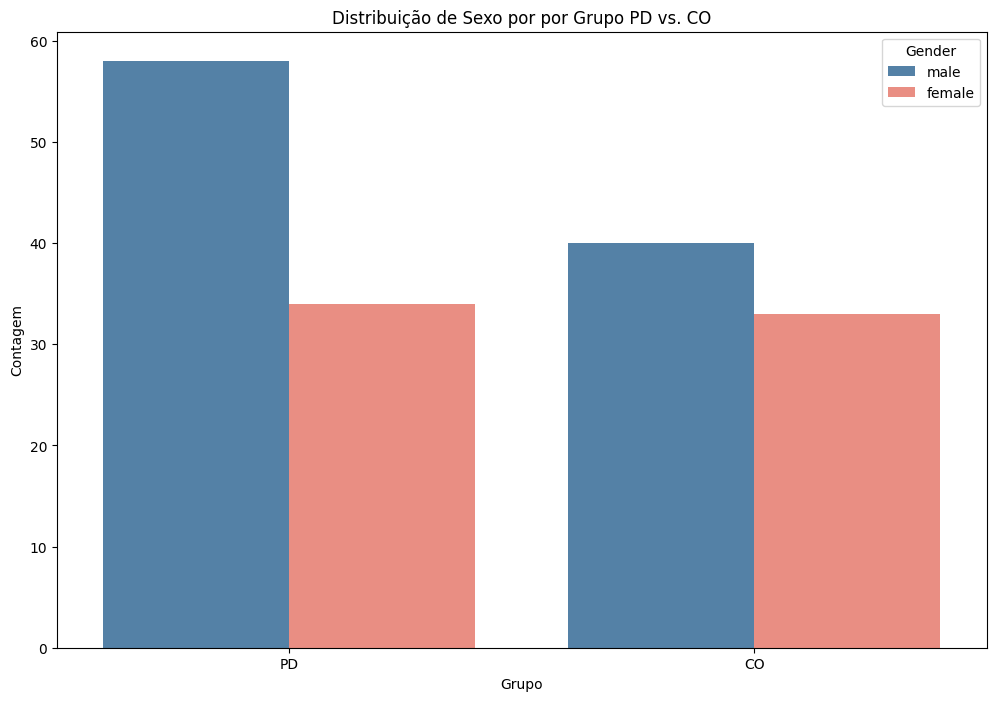

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Group", hue="Gender", palette=["steelblue", "salmon"])
plt.title("Distribuição de Sexo por por Grupo PD vs. CO")
plt.xlabel("Grupo")
plt.ylabel("Contagem")

print("\n")
plt.show()

### 3.2.2 Gráfico de idade por grupo

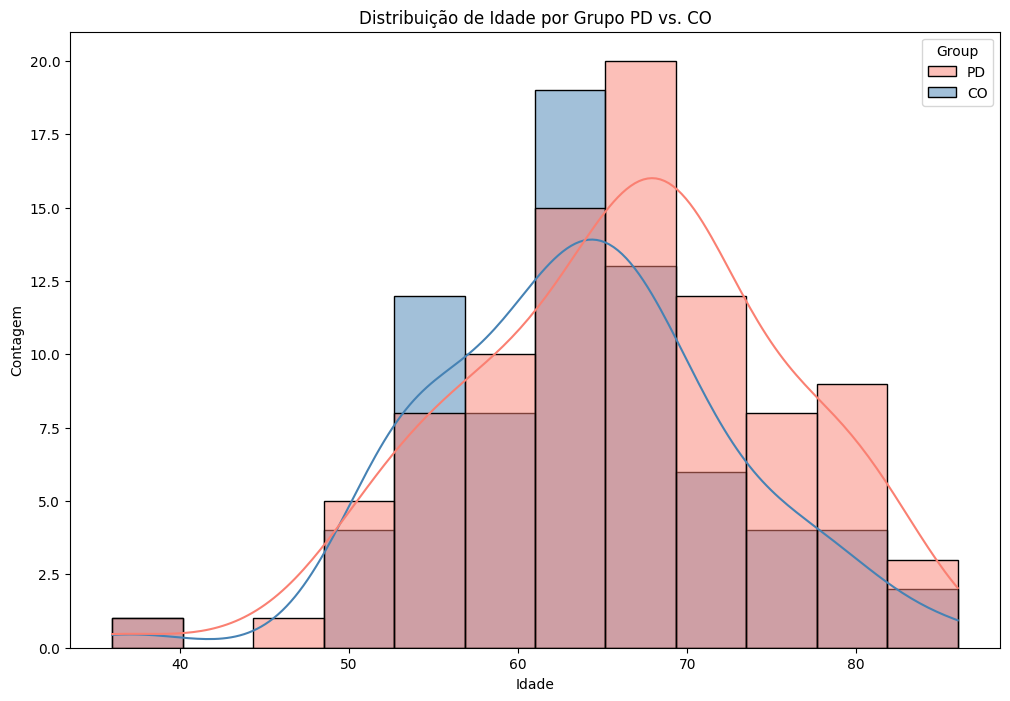

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Age", hue="Group", kde=True, palette=["salmon", "steelblue"])
plt.title("Distribuição de Idade por Grupo PD vs. CO")
plt.xlabel("Idade")
plt.ylabel("Contagem")

print("\n")
plt.show()

### 3.2.3 Gráfico das velocidades de marcha por grupo

Velocidades de marcha por grupo:





/tmp/ipython-input-3499710814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Group", y="Speed_01 (m/sec)", palette=["salmon", "steelblue"])


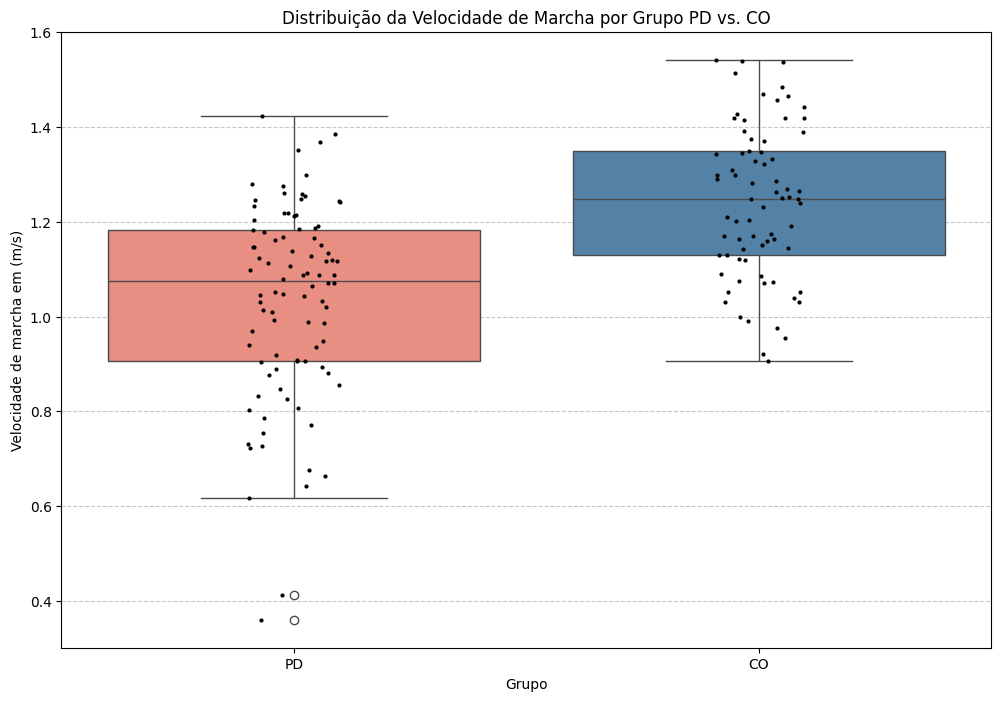

In [ ]:
print("Velocidades de marcha por grupo:\n")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x="Group", y="Speed_01 (m/sec)", palette=["salmon", "steelblue"])
sns.stripplot(data=df_filtered, x="Group", y="Speed_01 (m/sec)", color="black", size=3, jitter=True)
plt.title("Distribuição da Velocidade de Marcha por Grupo PD vs. CO")
plt.xlabel("Grupo")
plt.ylabel("Velocidade de marcha em (m/s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

print("\n")
plt.show()

### 3.2.4 Correlação entre a vdade e a velocidade de Marcha por Grupo (PD vs CO)

Correlação entre a vdade e a velocidade de Marcha por Grupo (PD vs CO):



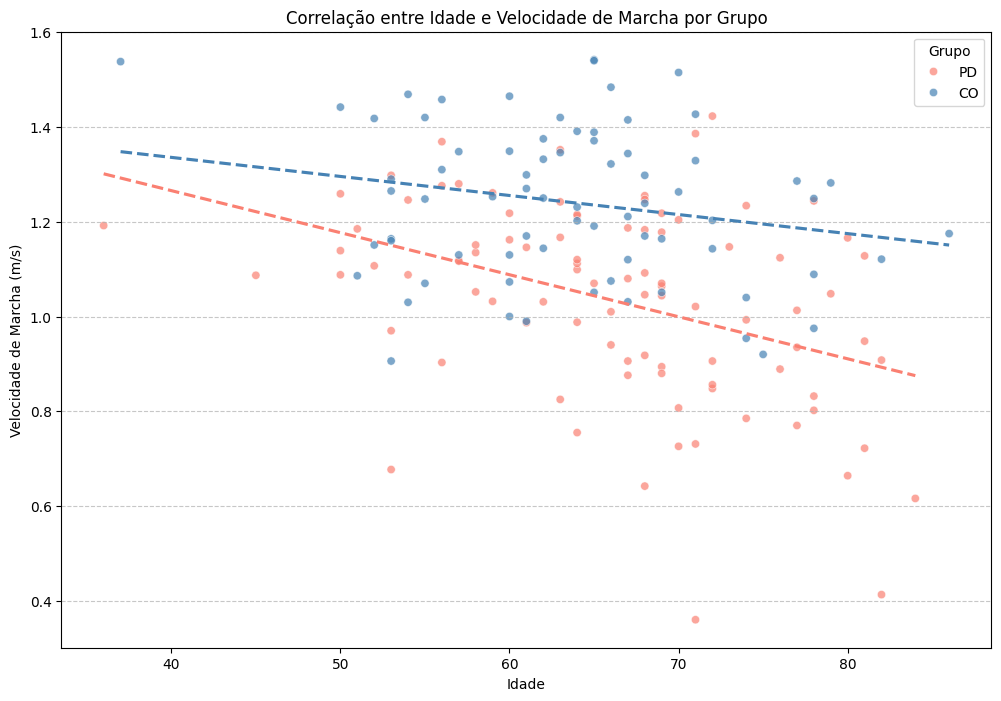

In [ ]:
print("Correlação entre a vdade e a velocidade de Marcha por Grupo (PD vs CO):\n")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x="Age", y="Speed_01 (m/sec)", hue="Group", palette=["salmon", "steelblue"], alpha=0.7)
sns.regplot(data=df_filtered[df_filtered["Group"] == "PD"], x="Age", y="Speed_01 (m/sec)", color="salmon", scatter=False, ci=None, line_kws={"linestyle":"--"})
sns.regplot(data=df_filtered[df_filtered["Group"] == "CO"], x="Age", y="Speed_01 (m/sec)", color="steelblue", scatter=False, ci=None, line_kws={"linestyle":"--"})
plt.title("Correlação entre Idade e Velocidade de Marcha por Grupo")
plt.xlabel("Idade")
plt.ylabel("Velocidade de Marcha (m/s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Grupo")

plt.show()
plt.close()

### 3.2.5 IMC vs Velocidade (PD × CO)

Antes, criamos a feature "IMC" utilizando as variáveis "Altura" e "Peso"

In [ ]:
# Garante que altura e peso estão em float
df_filtered["Height (meters)"] = pd.to_numeric(df_filtered["Height (meters)"], errors="coerce")
df_filtered["Weight (kg)"] = pd.to_numeric(df_filtered["Weight (kg)"], errors="coerce")

# Calcula o IMC
df_filtered["IMC"] = df_filtered["Weight (kg)"] / (df_filtered["Height (meters)"] ** 2)

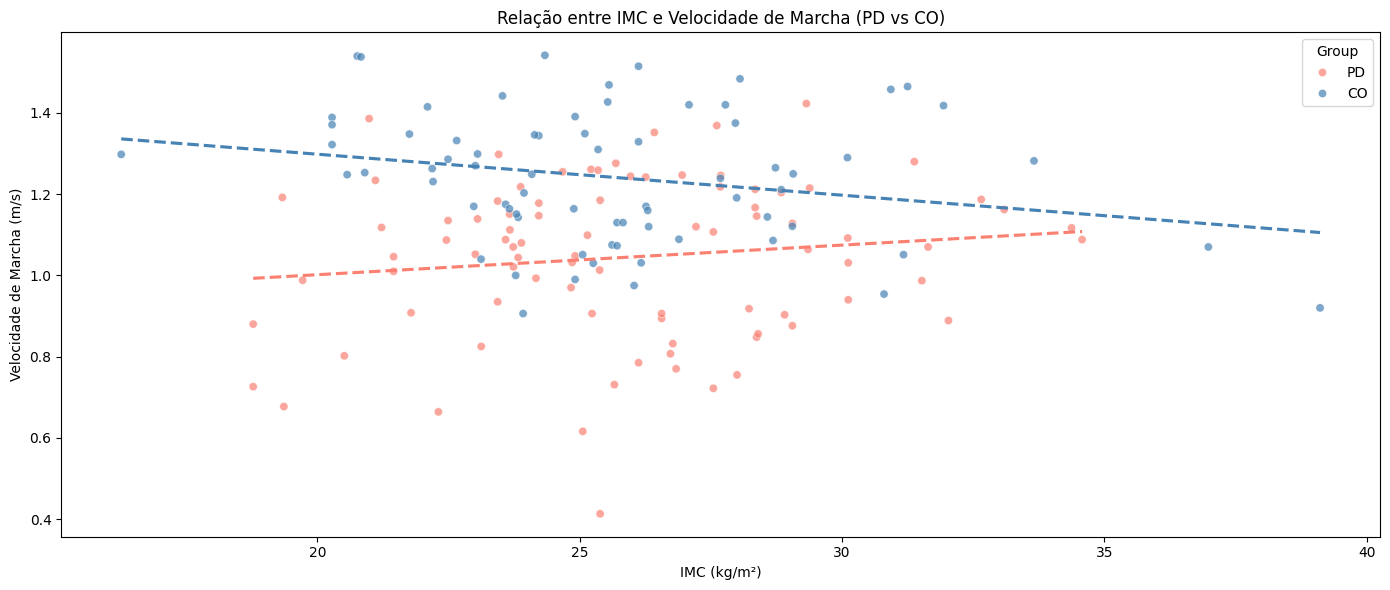

In [ ]:
palette = {"PD": "salmon", "CO": "steelblue"}
plt.figure(figsize=(14, 6))

# Scatterplot
sns.scatterplot(data=df_filtered, x="BMI", y="Speed_01 (m/sec)", hue="Group", palette=palette, alpha=0.7)

# Regressões separadas por grupo
sns.regplot(data=df_filtered[df_filtered["Group"] == "PD"], x="BMI", y="Speed_01 (m/sec)", color="salmon", scatter=False, ci=None, line_kws={"linestyle": "--"})
sns.regplot(data=df_filtered[df_filtered["Group"] == "CO"], x="BMI", y="Speed_01 (m/sec)", color="steelblue", scatter=False,ci=None, line_kws={"linestyle": "--"})

plt.title("Relação entre IMC e Velocidade de Marcha (PD vs CO)")
plt.xlabel("IMC (kg/m²)")
plt.ylabel("Velocidade de Marcha (m/s)")
plt.tight_layout()
plt.show()

# 4. Seção Ga – Análise Específica do Experimento Ga

## 4.1 Experimento Ga - 1min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Ga", "1min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Ga", "1min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Ga", "1min")

# Lista apenas arquivos Ga
ga_files = sorted(glob.glob(os.path.join(base_path, "Ga*.txt")))

print(f"Total de arquivos Ga encontrados: {len(ga_files)}")

Total de arquivos Ga encontrados: 113


In [ ]:
def plot_ga(path, tmax=60):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in ga_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_ga(path)

Gerando gráficos para: GaCo01_01.txt
Gerando gráficos para: GaCo02_01.txt
Gerando gráficos para: GaCo02_02.txt
Gerando gráficos para: GaCo03_01.txt
Gerando gráficos para: GaCo03_02.txt
Gerando gráficos para: GaCo04_01.txt
Gerando gráficos para: GaCo04_02.txt
Gerando gráficos para: GaCo05_01.txt
Gerando gráficos para: GaCo05_02.txt
Gerando gráficos para: GaCo06_01.txt
Gerando gráficos para: GaCo06_02.txt
Gerando gráficos para: GaCo07_01.txt
Gerando gráficos para: GaCo07_02.txt
Gerando gráficos para: GaCo08_01.txt
Gerando gráficos para: GaCo08_02.txt
Gerando gráficos para: GaCo09_01.txt
Gerando gráficos para: GaCo09_02.txt
Gerando gráficos para: GaCo10_01.txt
Gerando gráficos para: GaCo10_02.txt
Gerando gráficos para: GaCo11_01.txt
Gerando gráficos para: GaCo12_01.txt
Gerando gráficos para: GaCo13_01.txt
Gerando gráficos para: GaCo13_02.txt
Gerando gráficos para: GaCo13_10.txt
Gerando gráficos para: GaCo14_01.txt
Gerando gráficos para: GaCo14_02.txt
Gerando gráficos para: GaCo14_10.txt
G

## 4.2 Experimento Ga - 2min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Ga", "2min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Ga", "2min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Ga", "2min")

# Lista apenas arquivos Ga
ga_files = sorted(glob.glob(os.path.join(base_path, "Ga*.txt")))

print(f"Total de arquivos Ga encontrados: {len(ga_files)}")

Total de arquivos Ga encontrados: 113


In [ ]:
def plot_ga(path, tmax=120):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in ga_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_ga(path)

Gerando gráficos para: GaCo01_01.txt
Gerando gráficos para: GaCo02_01.txt
Gerando gráficos para: GaCo02_02.txt
Gerando gráficos para: GaCo03_01.txt
Gerando gráficos para: GaCo03_02.txt
Gerando gráficos para: GaCo04_01.txt
Gerando gráficos para: GaCo04_02.txt
Gerando gráficos para: GaCo05_01.txt
Gerando gráficos para: GaCo05_02.txt
Gerando gráficos para: GaCo06_01.txt
Gerando gráficos para: GaCo06_02.txt
Gerando gráficos para: GaCo07_01.txt
Gerando gráficos para: GaCo07_02.txt
Gerando gráficos para: GaCo08_01.txt
Gerando gráficos para: GaCo08_02.txt
Gerando gráficos para: GaCo09_01.txt
Gerando gráficos para: GaCo09_02.txt
Gerando gráficos para: GaCo10_01.txt
Gerando gráficos para: GaCo10_02.txt
Gerando gráficos para: GaCo11_01.txt
Gerando gráficos para: GaCo12_01.txt
Gerando gráficos para: GaCo13_01.txt
Gerando gráficos para: GaCo13_02.txt
Gerando gráficos para: GaCo13_10.txt
Gerando gráficos para: GaCo14_01.txt
Gerando gráficos para: GaCo14_02.txt
Gerando gráficos para: GaCo14_10.txt
G

# 5. Seção Ju – Análise Específica do Experimento Ju

## 5.1 Experimento Ju - 1min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Ju", "1min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Ju", "1min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Ju", "1min")

# Lista apenas arquivos Ju
ju_files = sorted(glob.glob(os.path.join(base_path, "Ju*.txt")))

print(f"Total de arquivos Ju encontrados: {len(ju_files)}")

Total de arquivos Ju encontrados: 129


In [ ]:
def plot_ju(path, tmax=60):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in ju_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_ju(path)

Gerando gráficos para: JuCo01_01.txt
Gerando gráficos para: JuCo02_01.txt
Gerando gráficos para: JuCo03_01.txt
Gerando gráficos para: JuCo04_01.txt
Gerando gráficos para: JuCo05_01.txt
Gerando gráficos para: JuCo06_01.txt
Gerando gráficos para: JuCo07_01.txt
Gerando gráficos para: JuCo08_01.txt
Gerando gráficos para: JuCo09_01.txt
Gerando gráficos para: JuCo11_01.txt
Gerando gráficos para: JuCo12_01.txt
Gerando gráficos para: JuCo13_01.txt
Gerando gráficos para: JuCo14_01.txt
Gerando gráficos para: JuCo15_01.txt
Gerando gráficos para: JuCo16_01.txt
Gerando gráficos para: JuCo17_01.txt
Gerando gráficos para: JuCo18_01.txt
Gerando gráficos para: JuCo19_01.txt
Gerando gráficos para: JuCo20_01.txt
Gerando gráficos para: JuCo21_01.txt
Gerando gráficos para: JuCo22_01.txt
Gerando gráficos para: JuCo23_01.txt
Gerando gráficos para: JuCo24_01.txt
Gerando gráficos para: JuCo25_01.txt
Gerando gráficos para: JuCo26_01.txt
Gerando gráficos para: JuPt01_01.txt
Gerando gráficos para: JuPt01_02.txt
G

## 5.2 Experimento Ju - 2min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Ju", "2min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Ju", "2min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Ju", "2min")

# Lista apenas arquivos Ju
ju_files = sorted(glob.glob(os.path.join(base_path, "Ju*.txt")))

print(f"Total de arquivos Ju encontrados: {len(ju_files)}")

Total de arquivos Ju encontrados: 129


In [ ]:
def plot_ju(path, tmax=120):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in ju_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_ju(path)

Gerando gráficos para: JuCo01_01.txt
Gerando gráficos para: JuCo02_01.txt
Gerando gráficos para: JuCo03_01.txt
Gerando gráficos para: JuCo04_01.txt
Gerando gráficos para: JuCo05_01.txt
Gerando gráficos para: JuCo06_01.txt
Gerando gráficos para: JuCo07_01.txt
Gerando gráficos para: JuCo08_01.txt
Gerando gráficos para: JuCo09_01.txt
Gerando gráficos para: JuCo11_01.txt
Gerando gráficos para: JuCo12_01.txt
Gerando gráficos para: JuCo13_01.txt
Gerando gráficos para: JuCo14_01.txt
Gerando gráficos para: JuCo15_01.txt
Gerando gráficos para: JuCo16_01.txt
Gerando gráficos para: JuCo17_01.txt
Gerando gráficos para: JuCo18_01.txt
Gerando gráficos para: JuCo19_01.txt
Gerando gráficos para: JuCo20_01.txt
Gerando gráficos para: JuCo21_01.txt
Gerando gráficos para: JuCo22_01.txt
Gerando gráficos para: JuCo23_01.txt
Gerando gráficos para: JuCo24_01.txt
Gerando gráficos para: JuCo25_01.txt
Gerando gráficos para: JuCo26_01.txt
Gerando gráficos para: JuPt01_01.txt
Gerando gráficos para: JuPt01_02.txt
G

# 6. Seção Si – Análise Específica do Experimento Si

## 6.1 Experimento Si - 1min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Si", "1min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Si", "1min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Si", "1min")

# Lista apenas arquivos Si
si_files = sorted(glob.glob(os.path.join(base_path, "Si*.txt")))

print(f"Total de arquivos Si encontrados: {len(si_files)}")

Total de arquivos Si encontrados: 64


In [ ]:
def plot_si(path, tmax=60):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in si_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_si(path)

Gerando gráficos para: SiCo01_01.txt
Gerando gráficos para: SiCo03_01.txt
Gerando gráficos para: SiCo04_01.txt
Gerando gráficos para: SiCo05_01.txt
Gerando gráficos para: SiCo06_01.txt
Gerando gráficos para: SiCo07_01.txt
Gerando gráficos para: SiCo08_01.txt
Gerando gráficos para: SiCo09_01.txt
Gerando gráficos para: SiCo10_01.txt
Gerando gráficos para: SiCo11_01.txt
Gerando gráficos para: SiCo12_01.txt
Gerando gráficos para: SiCo13_01.txt
Gerando gráficos para: SiCo14_01.txt
Gerando gráficos para: SiCo15_01.txt
Gerando gráficos para: SiCo16_01.txt
Gerando gráficos para: SiCo17_01.txt
Gerando gráficos para: SiCo18_01.txt
Gerando gráficos para: SiCo19_01.txt
Gerando gráficos para: SiCo20_01.txt
Gerando gráficos para: SiCo21_01.txt
Gerando gráficos para: SiCo22_01.txt
Gerando gráficos para: SiCo23_01.txt
Gerando gráficos para: SiCo24_01.txt
Gerando gráficos para: SiCo25_01.txt
Gerando gráficos para: SiCo26_01.txt
Gerando gráficos para: SiCo27_01.txt
Gerando gráficos para: SiCo28_01.txt
G

## 6.2 Experimento Si - 2min

In [ ]:
import glob
import os

base_path = "/content/drive/MyDrive/gait-in-parkinsons-disease-1.0.0"

BASE_IMG = "/content/drive/MyDrive/HAILab -  Human and Artificial Intelligence Laboratory/BRENO MACHADO/Gait in Parkinson's Disease/Imagens"

PATH_LEFT  = os.path.join(BASE_IMG, "Left-Foot", "Si", "2min")
PATH_RIGHT = os.path.join(BASE_IMG, "Right-Foot", "Si", "2min")
PATH_LR    = os.path.join(BASE_IMG, "Left-Right Foot", "Si", "2min")

# Lista apenas arquivos Ju
si_files = sorted(glob.glob(os.path.join(base_path, "Si*.txt")))

print(f"Total de arquivos Si encontrados: {len(si_files)}")

Total de arquivos Si encontrados: 64


In [ ]:
def plot_si(path, tmax=120):

    # Lê o arquivo
    df = pd.read_csv(path, sep=r"\s+", header=None)
    df = df[df[0] <= tmax]

    tempo   = df[0]
    total_L = df[17]
    total_R = df[18]

    fname = os.path.basename(path).replace(".txt", "")

    # Pé Esquerdo

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, color="salmon", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LEFT, f"{fname}_left.png"), dpi=150)
    plt.close()

    # Pé Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_R, color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_RIGHT, f"{fname}_right.png"), dpi=150)
    plt.close()

    # Pé Esquerdo vs Direito

    plt.figure(figsize=(14, 6))
    plt.plot(tempo, total_L, label="Pé Esquerdo", color="salmon", linewidth=1.5)
    plt.plot(tempo, total_R, label="Pé Direito", color="steelblue", linewidth=1.5)
    plt.title(f"Marcha – Força Total Pé Esquerdo vs Direito ({fname})")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Força Total (N)")
    plt.ylim(0, 1600)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()

    plt.savefig(os.path.join(PATH_LR, f"{fname}_left-right.png"), dpi=150)
    plt.close()

In [ ]:
for path in si_files:
    print(f"Gerando gráficos para: {os.path.basename(path)}")
    plot_si(path)

Gerando gráficos para: SiCo01_01.txt
Gerando gráficos para: SiCo03_01.txt
Gerando gráficos para: SiCo04_01.txt
Gerando gráficos para: SiCo05_01.txt
Gerando gráficos para: SiCo06_01.txt
Gerando gráficos para: SiCo07_01.txt
Gerando gráficos para: SiCo08_01.txt
Gerando gráficos para: SiCo09_01.txt
Gerando gráficos para: SiCo10_01.txt
Gerando gráficos para: SiCo11_01.txt
Gerando gráficos para: SiCo12_01.txt
Gerando gráficos para: SiCo13_01.txt
Gerando gráficos para: SiCo14_01.txt
Gerando gráficos para: SiCo15_01.txt
Gerando gráficos para: SiCo16_01.txt
Gerando gráficos para: SiCo17_01.txt
Gerando gráficos para: SiCo18_01.txt
Gerando gráficos para: SiCo19_01.txt
Gerando gráficos para: SiCo20_01.txt
Gerando gráficos para: SiCo21_01.txt
Gerando gráficos para: SiCo22_01.txt
Gerando gráficos para: SiCo23_01.txt
Gerando gráficos para: SiCo24_01.txt
Gerando gráficos para: SiCo25_01.txt
Gerando gráficos para: SiCo26_01.txt
Gerando gráficos para: SiCo27_01.txt
Gerando gráficos para: SiCo28_01.txt
G

# 7. Conclusão da Análise Exploratoria

A análise exploratória realizada nos permitiu uma compreensão aprofundada da estrutura, organização e características dos dados de marcha do *Gait in Parkinson’s Disease*. Investigamos aspectos demográficos, a distribuição dos arquivos por experimento (Ga, Ju e Si) e o comportamento dos sinais brutos de força plantar ao longo do tempo.


A padronização das visualizações nos possibilitou a identificar padrões de periodicidade, regularidade e possíveis assimetrias durante a marcha. Observamos que os sinais apresentam comportamento fisiologicamente consistente, com amplitudes compatíveis com forças verticais esperadas durante a marcha humana, além de variações associadas tanto ao protocolo experimental quanto à condição clínica dos indivíduos.